In [ ]:
!pip install shap
!pip install h2o

In [249]:
import pandas as pd
import shap
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn_pandas import DataFrameMapper
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn import metrics
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

In [250]:
# Import data
X, y = shap.datasets.boston()

Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :func:`~sklearn.datasets.fetch_california_housing`) and the Ames housing
    datas

Data viewing and seperating

In [251]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


1. **ZN**: proportion of residential land zoned for lots over 25,000 sq.ft.
2. **INDUS**: proportion of non-retail business acres per town.
3. **CHAS**: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
4. **NOX**: nitric oxides concentration (parts per 10 million).
5. **RM**: average number of rooms per dwelling.
6. **AGE**: proportion of owner-occupied units built prior to 1940.
7. **DIS**: weighted distances to ﬁve Boston employment centers.
8. **RAD**: index of accessibility to radial highways.
9. **TAX**: full-value property-tax rate per 10,000 dollars.
10. **PTRATIO**: pupil-teacher ratio by town 12. 
11. **B**: 1000(Bk−0.63)2 where Bk is the proportion of blacks by town 13. 
12. **LSTAT**: % lower status of the population.
13. **MEDV**: Median value of owner-occupied homes in $1000s.

Translate:
1. **ZN**：划为超过 25,000 平方英尺地块的住宅用地比例。
2. **INDUS**：每个城镇非零售商业英亩的比例。
3. **CHAS**：查尔斯河虚拟变量（= 1 如果区域边界河流；否则为 0）。
4. **NOX**：一氧化氮浓度（千万分之一）。
5. **RM**：每套住宅的平均房间数。
6. **AGE**：1940 年之前建造的自住单元的比例。
7. **DIS**：到五个波士顿就业中心的加权距离。
8. **RAD**：辐射状公路可达性指数。
9. **TAX**：每 10,000 美元的全值财产税税率。
10. **PTRATIO**：按镇 12 划分的师生比。
11. **B**: 1000(Bk−0.63)2 其中 Bk 是城镇 13 的黑人比例。
12. **LSTAT**：人口地位较低的百分比。
13. **MEDV**：自住房屋的中值，单位为 1000 美元。

In [252]:
# y's mean
print(f"y's mean value of median house price: ${round(y.mean(), 2)} thousands.")

y's mean value of median house price: $22.53 thousands.


In [253]:
# Seperate X & y to train/test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=False)

# **Linear Regression Model**

## *Data Preprocess & Model Fitting*

In [254]:
# Data Preprocessing & Transformation Mapping
catagorical_features = ['CHAS']
numerical_features = [c for c in X_train.columns if c not in catagorical_features]

cat = [([c], [OrdinalEncoder()]) for c in catagorical_features]
num = [([n], [SimpleImputer(), StandardScaler()]) for n in numerical_features]
mapper = DataFrameMapper(num + cat, df_out=True)

preprocessed_X_train = mapper.fit_transform(X_train)
preprocessed_X_train = sm.add_constant(preprocessed_X_train)

model = sm.OLS(y_train, preprocessed_X_train).fit()

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only


In [255]:
# Define function to evaluate Model's MSE
def evaluate(X, y, mapper=None, reg=None, transform=False):
    if transform:
        X = mapper.transform(X)
        X = sm.add_constant(X, has_constant='add') 
    y_pred = reg.predict(X)
    return mean_squared_error(y, y_pred)

train_mse = evaluate(X_train, y_train, mapper, model, True)
test_mse = evaluate(X_test, y_test, mapper, model, True)
print(f"train MSE = {round(train_mse, 3)}, test MSE = {round(test_mse, 3)} ")

train MSE = 23.234, test MSE = 10.806 


In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only


In [256]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     97.41
Date:                Tue, 06 Dec 2022   Prob (F-statistic):          1.35e-120
Time:                        04:24:16   Log-Likelihood:                -1361.2
No. Observations:                 455   AIC:                             2750.
Df Residuals:                     441   BIC:                             2808.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.7675      0.240     95.013      0.000      22.297      23.238
CRIM          -0.9544      0.316     -3.021      0.003      -1.575      -0.333
ZN             1.1903      0.347      3.426      0.001       0.508       1.873
INDUS          0.2159      0.445      0.485      0.628      -0.659       1.091
NOX           -2.0944      0.505     -4.148      0.000      -3.087      -1.102
RM             2.7612      0.317      8.700      0.000       2.137       3.385
AGE            0.3042      0.411      0.739      0.460      -0.504       1.113
DIS           -3.1207      0.460     -6.788      0.000      -4.024      -2.217
RAD            2.9649      0.678      4.372      0.000       1.632       4.298
TAX           -2.4522      0.715     -3.430      0.001      -3.857      -1.047
PTRATIO       -2.0042      0.310     -6.468      0.000      -2.613      -1.395
B              0.8742      0.272      3.213      0.001       0.339       1.409
LSTAT         -4.0539      0.394    -10.283      0.000      -4.829      -3.279
CHAS           2.5088      0.895      2.804      0.005       0.750       4.267
==============================================================================
Omnibus:                      152.667   Durbin-Watson:                   1.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              592.005
Skew:                           1.474   Prob(JB):                    2.80e-129
Kurtosis:                       7.747   Cond. No.                         10.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## *Model Interpretation*

In [257]:
# Sklearn Pipeline preprocessing
cat = [([c], [SimpleImputer(strategy='constant', fill_value=0),
              OrdinalEncoder()]) for c in catagorical_features]
num = [([n], [SimpleImputer(), StandardScaler()]) for n in numerical_features]
mapper = DataFrameMapper(num + cat, df_out=True)

pipeline = Pipeline([('preprocess', mapper), ('reg', LinearRegression())]);
p = pipeline.fit(X_train, y_train)

explainer = shap.Explainer(pipeline.predict, X_train)
shap_values = explainer(X_test)

Permutation explainer: 52it [00:24,  1.26it/s]


### Interpret Coefficient with Partial Dependence Plots

In [258]:
def partial_dependence_plot(feature, idx=None):
    if idx is None: # visualize all samples
        shap.plots.partial_dependence(
            feature,
            pipeline.predict,
            X_train, 
            ice=False,
            model_expected_value=True, 
            feature_expected_value=True)
    else: # visualize sample idx
        shap.partial_dependence_plot(
            feature, 
            pipeline.predict,
            X_train, 
            ice=False,
            model_expected_value=True, 
            feature_expected_value=True,
            shap_values=shap_values[idx:idx+1,:])

<Figure size 2160x2160 with 0 Axes>

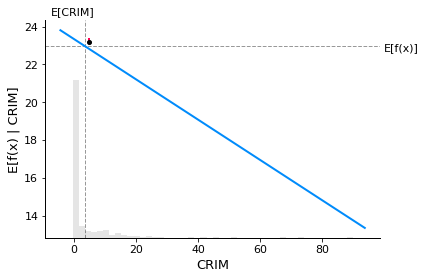

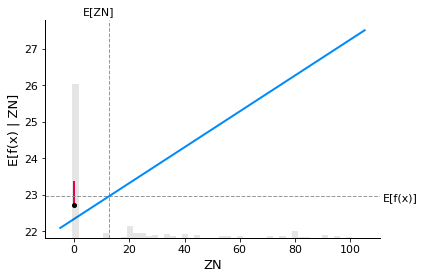

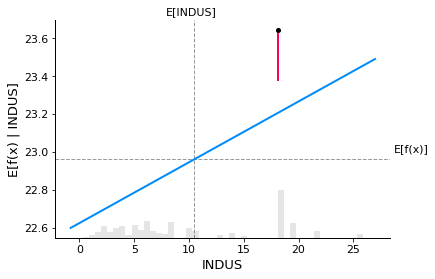

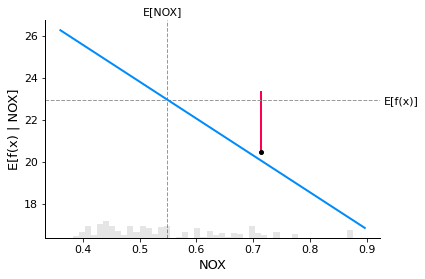

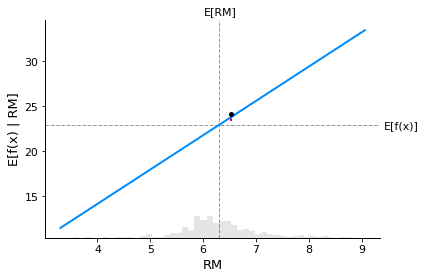

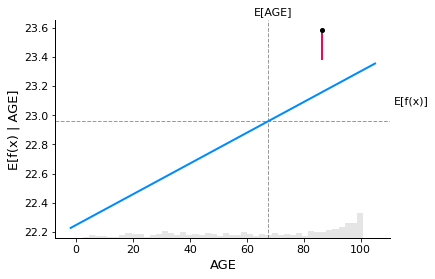

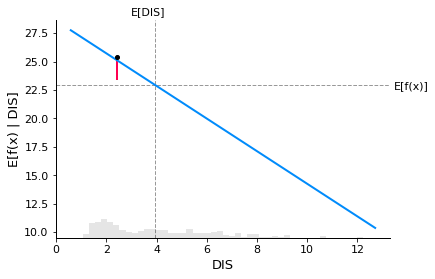

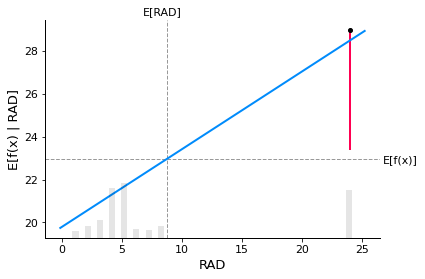

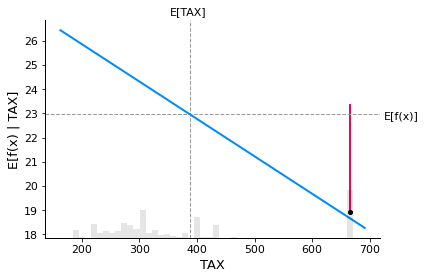

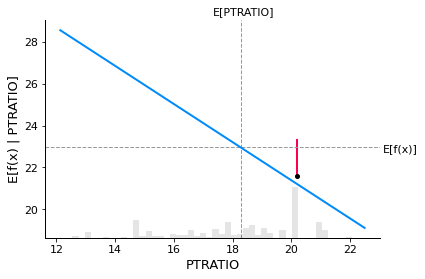

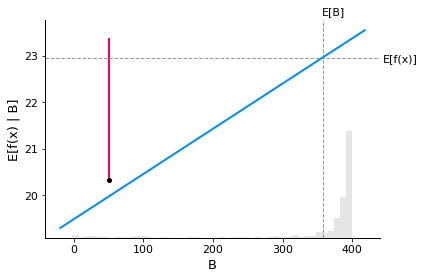

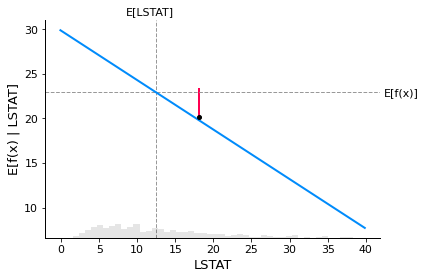

In [259]:
plt.figure(figsize=(30,6*5))

for i in numerical_features:
  partial_dependence_plot(i, 0)

### Interpret all features' coefficient with SHAP Plots

In [260]:
def sample_feature_importance(idx, type='condensed'):
    if type == 'condensed':
        return shap.plots.force(shap_values[idx])
    elif type == 'waterfall':
        return shap.plots.waterfall(shap_values[idx])
    else:
        return "Return valid visual ('condensed', 'waterfall')"

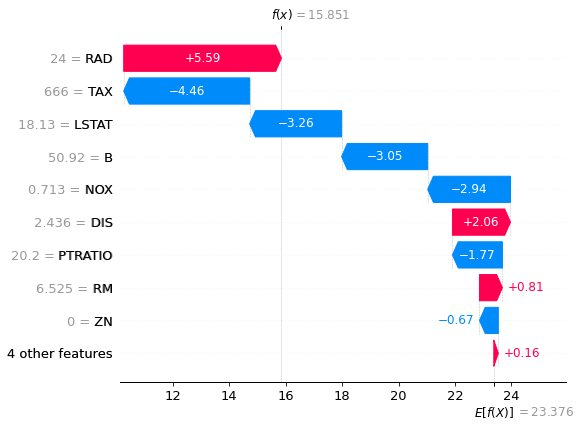

In [261]:
shap.initjs()
sample_feature_importance(0, 'waterfall')

In [262]:
shap.initjs()
sample_feature_importance(0, 'condensed')

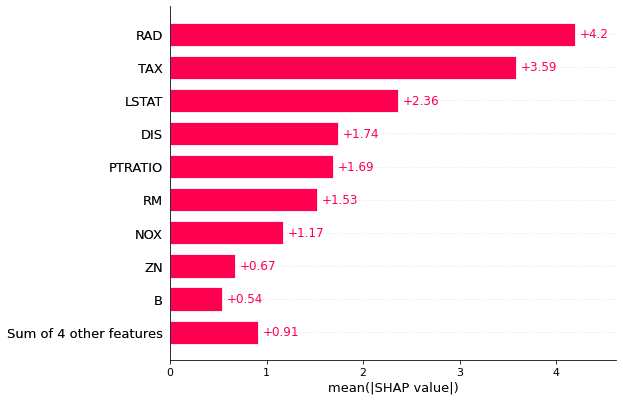

In [263]:
shap.plots.bar(shap_values)



> **Conclusion**: According to the graph, two most important features in the Linear Regression Model is **RAD** & **TAX**, and one of them has positive effect and the other has negative effect.



# **Tree-based Model**

## *Data Preprocess & Model Fitting*

In [264]:
tree_model = RandomForestRegressor()
tree_model.fit(X=X_train, y=y_train)

RandomForestRegressor()

## *Model Interpretation*

In [265]:
explainer = shap.TreeExplainer(tree_model, X_train)
shap_values = explainer(X_test)
# shap_values = explainer.shap_values(X_test)

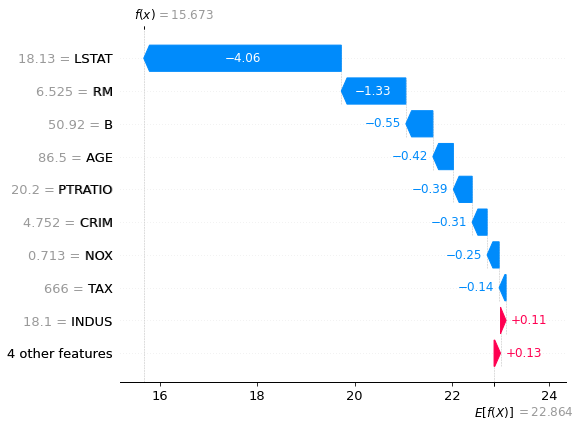

In [266]:
shap.initjs()
sample_feature_importance(0, 'waterfall')

In [267]:
shap.initjs()
sample_feature_importance(0, 'condensed')

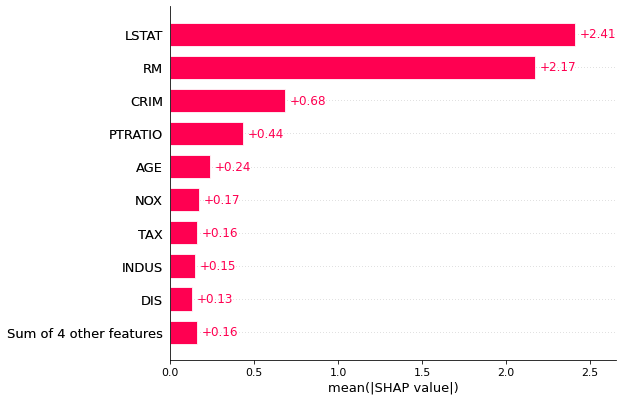

In [268]:
shap.plots.bar(shap_values)


> **Conclusion**: According to the Tree base regression, two most important features is **LSTAT** & **RM**, which has strongly negative effect on house price in Boston

# **AutoML**

In [269]:
import h2o
from h2o.automl import H2OAutoML
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

# Start the H2O cluster (locally)
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,1 hour 55 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.3
H2O_cluster_version_age:,12 days
H2O_cluster_name:,H2O_from_python_unknownUser_8kr5gs
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.148 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


## Data Preprocess & Model Fitting

In [270]:
# Transform into H2O Frame
X_h2o = h2o.H2OFrame(X)
y_h2o = h2o.H2OFrame(y)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [271]:
# Combine two dataset into one
data = X_h2o.cbind(y_h2o);
# data["CHAS"] = data["CHAS"].asfactor()

data.describe()

Rows:506
Cols:14

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,C1
type,real,real,real,int,real,real,real,real,int,int,real,real,real,real
mins,0.00632,0.0,0.46,0.0,0.385,3.561,2.9,1.1296,1.0,187.0,12.6,0.32,1.73,5.0
mean,3.613523557312253,11.363636363636365,11.136778656126484,0.0691699604743083,0.554695059288538,6.28463438735178,68.5749011857708,3.7950426877470367,9.549407114624506,408.23715415019757,18.455533596837927,356.6740316205534,12.653063241106722,22.532806324110666
maxs,88.9762,100.0,27.74,1.0,0.871,8.78,100.0,12.1265,24.0,711.0,22.0,396.9,37.97,50.0
sigma,8.601545105332491,23.32245299451514,6.860352940897589,0.25399404134041037,0.11587767566755584,0.7026171434153232,28.148861406903595,2.1057101266276104,8.707259384239366,168.53711605495903,2.1649455237144455,91.29486438415782,7.141061511348571,9.197104087379815
zeros,0,372,0,471,0,0,0,0,0,0,0,0,0,0
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


In [272]:
# Seperate X & y to train/test set
train, test = data.split_frame(ratios = [0.8], seed = 1)
response = "C1"

In [273]:
aml = H2OAutoML(max_runtime_secs = 60, seed = 1)
aml.train(y = response, training_frame = train, leaderboard_frame = test)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
mae,2.0928042,0.1849863,2.3786583,1.9178324,1.9633605,2.040343,2.1638262
mean_residual_deviance,10.597831,4.24884,17.280647,6.0606527,8.39926,9.592446,11.656148
mse,10.597831,4.24884,17.280647,6.0606527,8.39926,9.592446,11.656148
null_deviance,6568.9,1473.084,8450.804,6486.6733,6324.781,4401.497,7180.745
r2,0.8717496,0.0355870,0.8361559,0.9144035,0.9027349,0.8405685,0.8648853
residual_deviance,837.0848,336.6612,1365.1711,539.3981,613.146,700.2486,967.46027
rmse,3.205653,0.6340549,4.1569996,2.4618392,2.8981476,3.0971675,3.41411
rmsle,0.1483285,0.0061011,0.1557917,0.1409690,0.1499360,0.1432905,0.1516553


In [274]:
aml.leaderboard.head()

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
StackedEnsemble_BestOfFamily_4_AutoML_12_20221206_42514,2.80712,7.87995,1.98371,0.121569,7.87995
StackedEnsemble_BestOfFamily_3_AutoML_12_20221206_42514,2.85674,8.16098,1.98069,0.122092,8.16098
StackedEnsemble_AllModels_2_AutoML_12_20221206_42514,2.91526,8.49872,2.03569,0.127033,8.49872
XGBoost_grid_1_AutoML_12_20221206_42514_model_21,2.92919,8.58017,2.17879,0.130577,8.58017
StackedEnsemble_BestOfFamily_2_AutoML_12_20221206_42514,2.963,8.77935,2.04189,0.127784,8.77935
XGBoost_grid_1_AutoML_12_20221206_42514_model_19,2.97697,8.86234,2.13671,0.130027,8.86234
XRT_1_AutoML_12_20221206_42514,2.97842,8.87099,2.12702,0.124584,8.87099
GBM_grid_1_AutoML_12_20221206_42514_model_12,2.98188,8.89158,2.15145,0.132431,8.89158
XGBoost_grid_1_AutoML_12_20221206_42514_model_15,3.00101,9.00609,2.1711,0.132614,9.00609
StackedEnsemble_AllModels_1_AutoML_12_20221206_42514,3.01998,9.12029,2.12658,0.13221,9.12029


## Model Interpretation

# Leaderboard

> Leaderboard shows models with their metrics and their predictions for a given row. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,rmse,mse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo,predict
StackedEnsemble_BestOfFamily_4_AutoML_12_20221206_42514,2.80712,7.87995,1.98371,0.121569,7.87995,119,0.202283,StackedEnsemble,34.6579
StackedEnsemble_BestOfFamily_3_AutoML_12_20221206_42514,2.85674,8.16098,1.98069,0.122092,8.16098,118,0.083267,StackedEnsemble,34.7956
StackedEnsemble_AllModels_2_AutoML_12_20221206_42514,2.91526,8.49872,2.03569,0.127033,8.49872,132,0.119125,StackedEnsemble,34.0633
XGBoost_grid_1_AutoML_12_20221206_42514_model_21,2.92919,8.58017,2.17879,0.130577,8.58017,136,0.011604,XGBoost,35.8178
StackedEnsemble_BestOfFamily_2_AutoML_12_20221206_42514,2.963,8.77935,2.04189,0.127784,8.77935,134,0.078218,StackedEnsemble,34.6086
XGBoost_grid_1_AutoML_12_20221206_42514_model_19,2.97697,8.86234,2.13671,0.130027,8.86234,436,0.012846,XGBoost,35.2112
XRT_1_AutoML_12_20221206_42514,2.97842,8.87099,2.12702,0.124584,8.87099,459,0.02217,DRF,33.8638
GBM_grid_1_AutoML_12_20221206_42514_model_12,2.98188,8.89158,2.15145,0.132431,8.89158,259,0.022974,GBM,34.1419
XGBoost_grid_1_AutoML_12_20221206_42514_model_15,3.00101,9.00609,2.1711,0.132614,9.00609,225,0.008792,XGBoost,36.855
StackedEnsemble_AllModels_1_AutoML_12_20221206_42514,3.01998,9.12029,2.12658,0.13221,9.12029,137,0.187896,StackedEnsemble,33.2501


# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

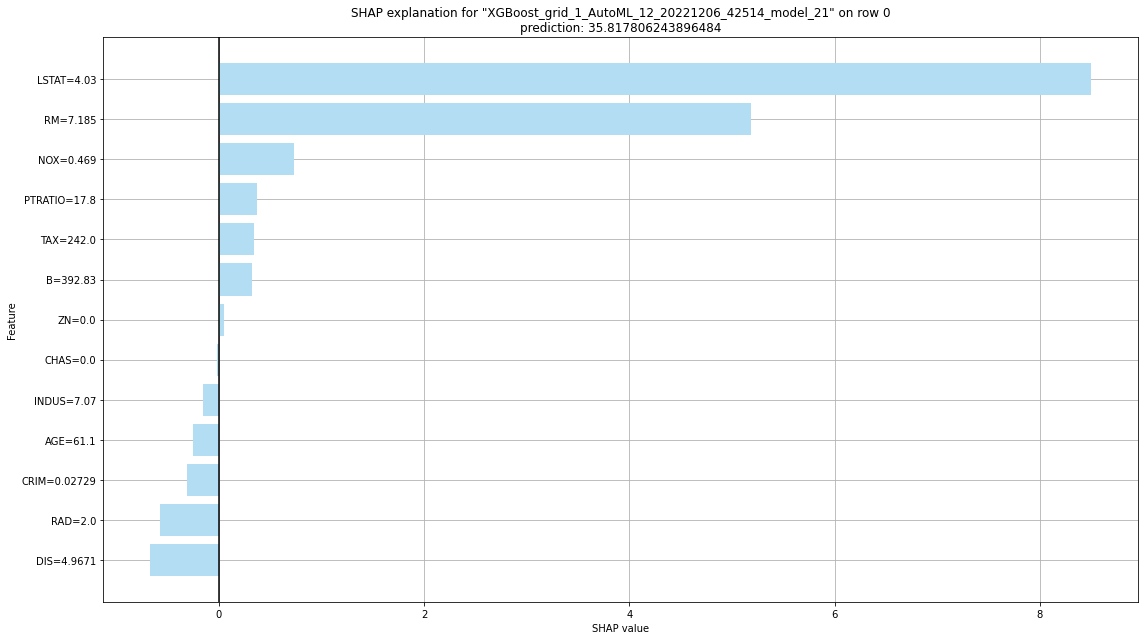

# Leaderboard

> Leaderboard shows models with their metrics and their predictions for a given row. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id,rmse,mse,mae,rmsle,mean_residual_deviance,training_time_ms,predict_time_per_row_ms,algo,predict
StackedEnsemble_BestOfFamily_4_AutoML_12_20221206_42514,2.80712,7.87995,1.98371,0.121569,7.87995,119,0.202283,StackedEnsemble,34.6579
StackedEnsemble_BestOfFamily_3_AutoML_12_20221206_42514,2.85674,8.16098,1.98069,0.122092,8.16098,118,0.083267,StackedEnsemble,34.7956
StackedEnsemble_AllModels_2_AutoML_12_20221206_42514,2.91526,8.49872,2.03569,0.127033,8.49872,132,0.119125,StackedEnsemble,34.0633
XGBoost_grid_1_AutoML_12_20221206_42514_model_21,2.92919,8.58017,2.17879,0.130577,8.58017,136,0.011604,XGBoost,35.8178
StackedEnsemble_BestOfFamily_2_AutoML_12_20221206_42514,2.963,8.77935,2.04189,0.127784,8.77935,134,0.078218,StackedEnsemble,34.6086
XGBoost_grid_1_AutoML_12_20221206_42514_model_19,2.97697,8.86234,2.13671,0.130027,8.86234,436,0.012846,XGBoost,35.2112
XRT_1_AutoML_12_20221206_42514,2.97842,8.87099,2.12702,0.124584,8.87099,459,0.02217,DRF,33.8638
GBM_grid_1_AutoML_12_20221206_42514_model_12,2.98188,8.89158,2.15145,0.132431,8.89158,259,0.022974,GBM,34.1419
XGBoost_grid_1_AutoML_12_20221206_42514_model_15,3.00101,9.00609,2.1711,0.132614,9.00609,225,0.008792,XGBoost,36.855
StackedEnsemble_AllModels_1_AutoML_12_20221206_42514,3.01998,9.12029,2.12658,0.13221,9.12029,137,0.187896,StackedEnsemble,33.2501


# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

In [275]:
# Cited from: https://www.kaggle.com/code/cristianlazoquispe/automl-h2o-shap-explanation
# Use
aml.explain_row(test, row_index=0)

> **Conclusion**: According to the AutoML, two most important features is **LSTAT** & **RM**, which has strongly negative effect on house price in Boston